In [1]:
# SPIKE AMPLITUDE PLOT

In [2]:
# Import Modulues 
import plot_functions as plot
import os
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
if os.path.basename(os.getcwd()) == "illustration":
    os.chdir("..")
import datajoint as dj
import datetime
import spikeinterface as si
from spikeinterface import widgets, exporters, postprocessing, qualitymetrics, sorters
from workflow.pipeline import *
from workflow.utils.paths import (
    get_ephys_root_data_dir,
    get_raw_root_data_dir,
    get_processed_root_data_dir,
)
from element_interface.utils import dict_to_uuid, find_full_path, find_root_directory
import numpy as np
from matplotlib import pyplot as plt
from workflow.utils.ingestion_utils import El2ROW

ValueError: not enough values to unpack (expected at least 2, got 1)

In [ ]:
# Create Experiment Ditionaries
# experiment info , session times , used electrodes , artifacts , sharps
# Contains 5 min segments used as example (don't have to use these segments)
Batches = ["Batch 1" , "Batch 2" , "Batch 3"]
Drugs = ["4-AP" , "No Drug" , "Bicuculline" , "Tetrodotoxin"]
Organoids = {}
Organoids["Batch 1"] = ["O09" , "O10" , "O11" , "O12"]
Organoids["Batch 2"] = ["O13" , "O14" , "O15" , "O16"]
Organoids["Batch 3"] = ["O17" , "O18" , "O19" , "O20"]


used_electrodes = {
                "O09":32 , "O10":16 , "O11":20 , "O12":14 , 
                "O13":25 , "O14":13 , "O15":11 , "O16":11 ,
                "O17":22 , "O18":19 , "O19":20 , "O20":17
                }

session_times = {} # middle of each 5 minute interval
session_times["Batch 1"] = {}
session_times["Batch 2"] = {}
session_times["Batch 3"] = {}

# Batch 1
session_times["Batch 1"]["O09_4-AP"] = datetime.datetime(2023 , 5 , 18 , 12 , 54)
session_times["Batch 1"]["O10_4-AP"] = datetime.datetime(2023 , 5 , 18 , 12 , 56)
session_times["Batch 1"]["O11_4-AP"] = datetime.datetime(2023 , 5 , 18 , 12 , 56)
session_times["Batch 1"]["O12_4-AP"] = datetime.datetime(2023 , 5 , 18 , 12 , 54)

session_times["Batch 1"]["O09_No Drug"] = datetime.datetime(2023 , 5 , 18 , 18 , 46)
session_times["Batch 1"]["O10_No Drug"] = datetime.datetime(2023 , 5 , 18 , 18 , 42)
session_times["Batch 1"]["O11_No Drug"] = datetime.datetime(2023 , 5 , 18 , 18 , 46)
session_times["Batch 1"]["O12_No Drug"] = datetime.datetime(2023 , 5 , 18 , 18 , 44)

session_times["Batch 1"]["O09_Bicuculline"] = datetime.datetime(2023 , 5 , 19 , 10 , 2)
session_times["Batch 1"]["O10_Bicuculline"] = datetime.datetime(2023 , 5 , 19 , 10 , 1)
session_times["Batch 1"]["O11_Bicuculline"] = datetime.datetime(2023 , 5 , 19 , 10 , 4)
session_times["Batch 1"]["O12_Bicuculline"] = datetime.datetime(2023 , 5 , 19 , 9 , 59)

session_times["Batch 1"]["O09_Tetrodotoxin"] = datetime.datetime(2023 , 5 , 19 , 16 , 16)
session_times["Batch 1"]["O10_Tetrodotoxin"] = datetime.datetime(2023 , 5 , 19 , 16 , 12)
session_times["Batch 1"]["O11_Tetrodotoxin"] = datetime.datetime(2023 , 5 , 19 , 16 , 17)
session_times["Batch 1"]["O12_Tetrodotoxin"] = datetime.datetime(2023 , 5 , 19 , 16 , 15)

# Batch 2
session_times["Batch 2"]["O13_4-AP"] = datetime.datetime(2023 , 6 , 8 , 19 , 33)
session_times["Batch 2"]["O14_4-AP"] = datetime.datetime(2023 , 6 , 8 , 19 , 24)
session_times["Batch 2"]["O15_4-AP"] = datetime.datetime(2023 , 6 , 8 , 19 , 26)
session_times["Batch 2"]["O16_4-AP"] = datetime.datetime(2023 , 6 , 8 , 19 , 27)

session_times["Batch 2"]["O13_No Drug"] = datetime.datetime(2023 , 6 , 9 , 0 , 1)
session_times["Batch 2"]["O14_No Drug"] = datetime.datetime(2023 , 6 , 8 , 23 , 56)
session_times["Batch 2"]["O15_No Drug"] = datetime.datetime(2023 , 6 , 9 , 0 , 1)
session_times["Batch 2"]["O16_No Drug"] = datetime.datetime(2023 , 6 , 9 , 0 , 4)

session_times["Batch 2"]["O13_Bicuculline"] = datetime.datetime(2023 , 6 , 9 , 10 , 45)
session_times["Batch 2"]["O14_Bicuculline"] = datetime.datetime(2023 , 6 , 9 , 10 , 45)
session_times["Batch 2"]["O15_Bicuculline"] = datetime.datetime(2023 , 6 , 9 , 10 , 46)
session_times["Batch 2"]["O16_Bicuculline"] = datetime.datetime(2023 , 6 , 9 , 10 , 50)

session_times["Batch 2"]["O13_Tetrodotoxin"] = datetime.datetime(2023 , 6 , 9 , 16 , 4)
session_times["Batch 2"]["O14_Tetrodotoxin"] = datetime.datetime(2023 , 6 , 9 , 16 , 4)
session_times["Batch 2"]["O15_Tetrodotoxin"] = datetime.datetime(2023 , 6 , 9 , 16 , 13)
session_times["Batch 2"]["O16_Tetrodotoxin"] = datetime.datetime(2023 , 6 , 9 , 16 , 7)

# Batch 3
session_times["Batch 3"]["O17_4-AP"] = datetime.datetime(2023 , 7 , 12 , 13 , 32)
session_times["Batch 3"]["O18_4-AP"] = datetime.datetime(2023 , 7 , 12 , 13 , 31)
session_times["Batch 3"]["O19_4-AP"] = datetime.datetime(2023 , 7 , 12 , 13 , 34)
session_times["Batch 3"]["O20_4-AP"] = datetime.datetime(2023 , 7 , 12 , 13 , 34)

session_times["Batch 3"]["O17_No Drug"] = datetime.datetime(2023 , 7 , 12 , 16 , 32)
session_times["Batch 3"]["O18_No Drug"] = datetime.datetime(2023 , 7 , 12 , 16 , 37)
session_times["Batch 3"]["O19_No Drug"] = datetime.datetime(2023 , 7 , 12 , 16 , 34)
session_times["Batch 3"]["O20_No Drug"] = datetime.datetime(2023 , 7 , 12 , 16 , 43)

session_times["Batch 3"]["O17_Bicuculline"] = datetime.datetime(2023 , 7 , 13 , 12 , 58)
session_times["Batch 3"]["O18_Bicuculline"] = datetime.datetime(2023 , 7 , 13 , 13 , 8)
session_times["Batch 3"]["O19_Bicuculline"] = datetime.datetime(2023 , 7 , 13 , 13 , 2)
session_times["Batch 3"]["O20_Bicuculline"] = datetime.datetime(2023 , 7 , 13 , 13 , 7)

session_times["Batch 3"]["O17_Tetrodotoxin"] = datetime.datetime(2023 , 7 , 13 , 18 , 36)
session_times["Batch 3"]["O18_Tetrodotoxin"] = datetime.datetime(2023 , 7 , 13 , 18 , 39)
session_times["Batch 3"]["O19_Tetrodotoxin"] = datetime.datetime(2023 , 7 , 13 , 18 , 41)
session_times["Batch 3"]["O20_Tetrodotoxin"] = datetime.datetime(2023 , 7 , 13 , 18 , 40)

In [ ]:
# Get Tasks (ephys.ClusteringTask())
# One 5 min segment for each drug and organoid (from dictionaries above)

paramset_idx = 1

global_key = []
for batch in Batches:
    for drug in Drugs:
        for organoid in Organoids[batch]:

            # Find sesssion
            title = f"{organoid}_{drug}"
            time = session_times[batch][title]

            start_time = (time - datetime.timedelta(minutes=2)).strftime("%Y-%m-%d %H:%M:%S")
            end_time = (time + datetime.timedelta(minutes=3)).strftime("%Y-%m-%d %H:%M:%S")

            key = {"organoid_id":organoid , "start_time":start_time , "end_time":end_time , "paramset_idx":paramset_idx}
            global_key.append(key)

Tasks = plot.data.get_tasks(global_key=global_key) 

Tasks


organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,clustering_output_dir clustering output directory relative to the clustering root data directory
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,O09-12_raw/202305181252_202305181257/O09/spykingcircus2_1
O09,2023-05-18 18:15:00,0,2023-05-18 18:44:00,2023-05-18 18:49:00,1,O09-12_raw/202305181844_202305181849/O09/spykingcircus2_1
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,O09-12_raw/202305191000_202305191005/O09/spykingcircus2_1
O10,2023-05-18 12:25:00,0,2023-05-18 12:54:00,2023-05-18 12:59:00,1,O09-12_raw/202305181254_202305181259/O10/spykingcircus2_1
O10,2023-05-18 18:15:00,0,2023-05-18 18:40:00,2023-05-18 18:45:00,1,O09-12_raw/202305181840_202305181845/O10/spykingcircus2_1
O10,2023-05-19 09:30:00,0,2023-05-19 09:59:00,2023-05-19 10:04:00,1,O09-12_raw/202305190959_202305191004/O10/spykingcircus2_1
O10,2023-05-19 15:45:00,0,2023-05-19 16:10:00,2023-05-19 16:15:00,1,O09-12_raw/202305191610_202305191615/O10/spykingcircus2_1
O11,2023-05-18 12:25:00,0,2023-05-18 12:54:00,2023-05-18 12:59:00,1,O09-12_raw/202305181254_202305181259/O11/spykingcircus2_1
O11,2023-05-18 18:15:00,0,2023-05-18 18:44:00,2023-05-18 18:49:00,1,O09-12_raw/202305181844_202305181849/O11/spykingcircus2_1
O11,2023-05-19 09:30:00,0,2023-05-19 10:02:00,2023-05-19 10:07:00,1,O09-12_raw/202305191002_202305191007/O11/spykingcircus2_1


In [ ]:
# Get Data (Peak Waveforms)

global_query = ephys.WaveformSet.PeakWaveform()
Values = ["peak_electrode_waveform"]

data = plot.data.get_data(Tasks=Tasks , global_query=global_query , Values=Values)

directory error for 


In [ ]:
# Convert Data (Peak Waveforms --> Spike Ampltiude)

new_data = {}
no_data = []
for key , value in data.items():

    if value == "no data": # record if there's no data
        no_data.append(key)

    else: # find and record amplitude values from waveforms

        # extract waveforms from data dictionary
        Waveforms = value["peak_electrode_waveform"]

        # formatting (array([array([])])) --> array([ [], [], [] ])
        Waveforms = np.vstack(Waveforms)

        # loop through waveforms and find/record the amplitude
        amplitude = []
        for waveform in Waveforms:

            amplitude.append(abs(waveform).max())

        # Set a maximum for amplitude at 20 to avoid artifacts
        amplitude = list(np.clip(a=np.array(amplitude) , a_min=None , a_max=20))    

        # Put back into data dictionary with the same key (same key is important)
        new_data[key] = amplitude

In [ ]:
# Group Data

# For Amplitude Values
# Going to group by batch and drug
amp_data = plot.data.group_data(data=new_data , batch=True , drug=True)

In [ ]:
# Format Data

# Put into format to plot for horizontal histogram
# nested dictionary --> numpy arrays
amp , bins , labels = plot.format.horhist(data=amp_data , key2_order=Drugs)

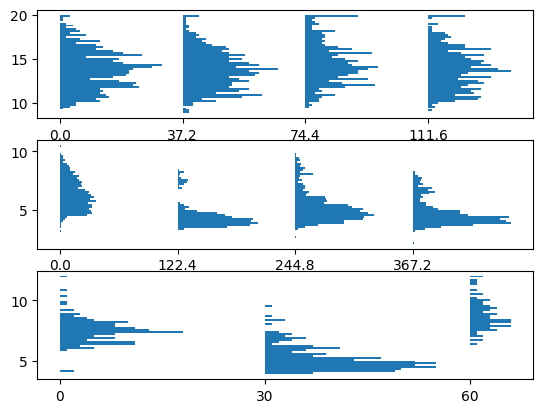

In [ ]:
# Plot Data
# 3 stacked figures horizontal histograms 
# each figure has a histogram for each drug treatment

nrows = 3
ncols = 1

# get figure type
figure_type = {}
for x in range(nrows):
    figure_type[(x,0)] = "horhist"

# get figure data
figure_data = {}
for x , batch in enumerate(Batches):
    figure_data[(x,0)] = {}
    
    figure_data[(x,0)]["horhist_data"] = amp[batch]
    figure_data[(x,0)]["bins"] = bins[batch]

# Plot Data
fig , ax , plot_ax = plot.plot.get_figure(nrows=nrows , ncols=ncols , figure_type=figure_type , figure_data=figure_data)

    

No data for: 
 []


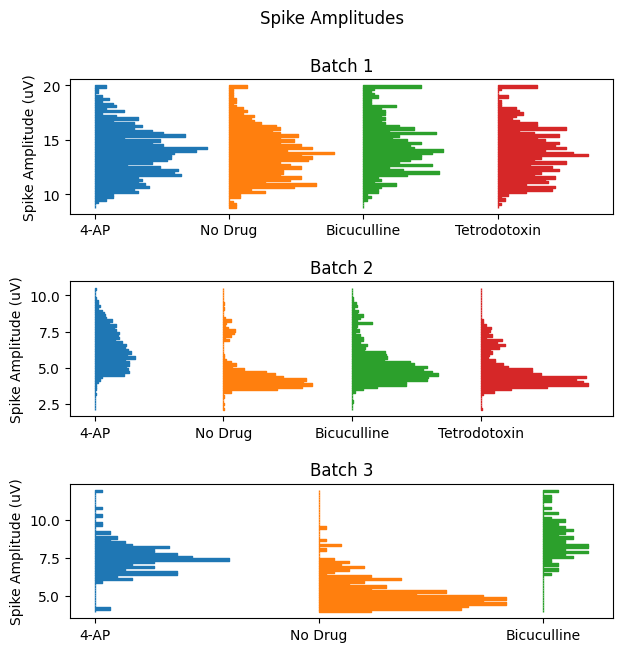

In [ ]:
# Customize Plot

# Customize
batch_titles = list(labels.keys())
plot_colors = ["tab:blue" , "tab:orange" , "tab:green" , "tab:red"]

# Figure Customization
fig.suptitle(f"Spike Amplitudes")
fig.subplots_adjust(hspace=.5 , wspace=.3)
fig.set_figheight(7)
fig.set_figwidth(7)

# Axis Customization
for idx, a in enumerate(ax):
    a.set_title(f"{batch_titles[idx]}")
    a.set_ylabel("Spike Amplitude (uV)")
    a.set_xticklabels(labels[batch_titles[idx]])

# Plot axis customization
for pax in plot_ax.values(): # plot ax

    # 2D list (4 , 50 value list)
    for gidx , gax in enumerate(pax): # group axis
        for bax in gax: # bar axis
            bax.set_color(plot_colors[gidx])

print(f"No data for: \n {no_data}")
fig


In [ ]:
# FIRING MAP

In [ ]:
# Import Modulues 
import plot_functions as plot
import os
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
if os.path.basename(os.getcwd()) == "illustration":
    os.chdir("..")
import datajoint as dj
import datetime
import spikeinterface as si
from spikeinterface import widgets, exporters, postprocessing, qualitymetrics, sorters
from workflow.pipeline import *
from workflow.utils.paths import (
    get_ephys_root_data_dir,
    get_raw_root_data_dir,
    get_processed_root_data_dir,
)
from element_interface.utils import dict_to_uuid, find_full_path, find_root_directory
import numpy as np
from matplotlib import pyplot as plt
from workflow.utils.ingestion_utils import El2ROW
import matplotlib
import matplotlib.colors as mcolors

In [ ]:
# Create Experiment Ditionaries
# experiment info , session times , used electrodes , artifacts , sharps
# Contains 5 min segments used as example (don't have to use these segments)
Batches = ["Batch 1" , "Batch 2" , "Batch 3"]
Drugs = ["4-AP" , "No Drug" , "Bicuculline" , "Tetrodotoxin"]
Organoids = {}
Organoids["Batch 1"] = ["O09" , "O10" , "O11" , "O12"]
Organoids["Batch 2"] = ["O13" , "O14" , "O15" , "O16"]
Organoids["Batch 3"] = ["O17" , "O18" , "O19" , "O20"]


used_electrodes = {
                "O09":32 , "O10":16 , "O11":20 , "O12":14 , 
                "O13":25 , "O14":13 , "O15":11 , "O16":11 ,
                "O17":22 , "O18":19 , "O19":20 , "O20":17
                }

session_times = {} # middle of each 5 minute interval
session_times["Batch 1"] = {}
session_times["Batch 2"] = {}
session_times["Batch 3"] = {}

# Batch 1
session_times["Batch 1"]["O09_4-AP"] = datetime.datetime(2023 , 5 , 18 , 12 , 54)
session_times["Batch 1"]["O10_4-AP"] = datetime.datetime(2023 , 5 , 18 , 12 , 56)
session_times["Batch 1"]["O11_4-AP"] = datetime.datetime(2023 , 5 , 18 , 12 , 56)
session_times["Batch 1"]["O12_4-AP"] = datetime.datetime(2023 , 5 , 18 , 12 , 54)

session_times["Batch 1"]["O09_No Drug"] = datetime.datetime(2023 , 5 , 18 , 18 , 46)
session_times["Batch 1"]["O10_No Drug"] = datetime.datetime(2023 , 5 , 18 , 18 , 42)
session_times["Batch 1"]["O11_No Drug"] = datetime.datetime(2023 , 5 , 18 , 18 , 46)
session_times["Batch 1"]["O12_No Drug"] = datetime.datetime(2023 , 5 , 18 , 18 , 44)

session_times["Batch 1"]["O09_Bicuculline"] = datetime.datetime(2023 , 5 , 19 , 10 , 2)
session_times["Batch 1"]["O10_Bicuculline"] = datetime.datetime(2023 , 5 , 19 , 10 , 1)
session_times["Batch 1"]["O11_Bicuculline"] = datetime.datetime(2023 , 5 , 19 , 10 , 4)
session_times["Batch 1"]["O12_Bicuculline"] = datetime.datetime(2023 , 5 , 19 , 9 , 59)

session_times["Batch 1"]["O09_Tetrodotoxin"] = datetime.datetime(2023 , 5 , 19 , 16 , 16)
session_times["Batch 1"]["O10_Tetrodotoxin"] = datetime.datetime(2023 , 5 , 19 , 16 , 12)
session_times["Batch 1"]["O11_Tetrodotoxin"] = datetime.datetime(2023 , 5 , 19 , 16 , 17)
session_times["Batch 1"]["O12_Tetrodotoxin"] = datetime.datetime(2023 , 5 , 19 , 16 , 15)

# Batch 2
session_times["Batch 2"]["O13_4-AP"] = datetime.datetime(2023 , 6 , 8 , 19 , 33)
session_times["Batch 2"]["O14_4-AP"] = datetime.datetime(2023 , 6 , 8 , 19 , 24)
session_times["Batch 2"]["O15_4-AP"] = datetime.datetime(2023 , 6 , 8 , 19 , 26)
session_times["Batch 2"]["O16_4-AP"] = datetime.datetime(2023 , 6 , 8 , 19 , 27)

session_times["Batch 2"]["O13_No Drug"] = datetime.datetime(2023 , 6 , 9 , 0 , 1)
session_times["Batch 2"]["O14_No Drug"] = datetime.datetime(2023 , 6 , 8 , 23 , 56)
session_times["Batch 2"]["O15_No Drug"] = datetime.datetime(2023 , 6 , 9 , 0 , 1)
session_times["Batch 2"]["O16_No Drug"] = datetime.datetime(2023 , 6 , 9 , 0 , 4)

session_times["Batch 2"]["O13_Bicuculline"] = datetime.datetime(2023 , 6 , 9 , 10 , 45)
session_times["Batch 2"]["O14_Bicuculline"] = datetime.datetime(2023 , 6 , 9 , 10 , 45)
session_times["Batch 2"]["O15_Bicuculline"] = datetime.datetime(2023 , 6 , 9 , 10 , 46)
session_times["Batch 2"]["O16_Bicuculline"] = datetime.datetime(2023 , 6 , 9 , 10 , 50)

session_times["Batch 2"]["O13_Tetrodotoxin"] = datetime.datetime(2023 , 6 , 9 , 16 , 4)
session_times["Batch 2"]["O14_Tetrodotoxin"] = datetime.datetime(2023 , 6 , 9 , 16 , 4)
session_times["Batch 2"]["O15_Tetrodotoxin"] = datetime.datetime(2023 , 6 , 9 , 16 , 13)
session_times["Batch 2"]["O16_Tetrodotoxin"] = datetime.datetime(2023 , 6 , 9 , 16 , 7)

# Batch 3
session_times["Batch 3"]["O17_4-AP"] = datetime.datetime(2023 , 7 , 12 , 13 , 32)
session_times["Batch 3"]["O18_4-AP"] = datetime.datetime(2023 , 7 , 12 , 13 , 31)
session_times["Batch 3"]["O19_4-AP"] = datetime.datetime(2023 , 7 , 12 , 13 , 34)
session_times["Batch 3"]["O20_4-AP"] = datetime.datetime(2023 , 7 , 12 , 13 , 34)

session_times["Batch 3"]["O17_No Drug"] = datetime.datetime(2023 , 7 , 12 , 16 , 32)
session_times["Batch 3"]["O18_No Drug"] = datetime.datetime(2023 , 7 , 12 , 16 , 37)
session_times["Batch 3"]["O19_No Drug"] = datetime.datetime(2023 , 7 , 12 , 16 , 34)
session_times["Batch 3"]["O20_No Drug"] = datetime.datetime(2023 , 7 , 12 , 16 , 43)

session_times["Batch 3"]["O17_Bicuculline"] = datetime.datetime(2023 , 7 , 13 , 12 , 58)
session_times["Batch 3"]["O18_Bicuculline"] = datetime.datetime(2023 , 7 , 13 , 13 , 8)
session_times["Batch 3"]["O19_Bicuculline"] = datetime.datetime(2023 , 7 , 13 , 13 , 2)
session_times["Batch 3"]["O20_Bicuculline"] = datetime.datetime(2023 , 7 , 13 , 13 , 7)

session_times["Batch 3"]["O17_Tetrodotoxin"] = datetime.datetime(2023 , 7 , 13 , 18 , 36)
session_times["Batch 3"]["O18_Tetrodotoxin"] = datetime.datetime(2023 , 7 , 13 , 18 , 39)
session_times["Batch 3"]["O19_Tetrodotoxin"] = datetime.datetime(2023 , 7 , 13 , 18 , 41)
session_times["Batch 3"]["O20_Tetrodotoxin"] = datetime.datetime(2023 , 7 , 13 , 18 , 40)

In [ ]:
# Get Tasks (ephys.ClusteringTask())
# One 5 min segment for each drug and organoid (from dictionaries above)

paramset_idx = 1

global_key = []
for batch in Batches:
    for drug in Drugs:
        for organoid in Organoids[batch]:

            # Find sesssion
            title = f"{organoid}_{drug}"
            time = session_times[batch][title]

            start_time = (time - datetime.timedelta(minutes=2)).strftime("%Y-%m-%d %H:%M:%S")
            end_time = (time + datetime.timedelta(minutes=3)).strftime("%Y-%m-%d %H:%M:%S")

            key = {"organoid_id":organoid , "start_time":start_time , "end_time":end_time , "paramset_idx":paramset_idx}
            global_key.append(key)

Tasks = plot.data.get_tasks(global_key=global_key) 

Tasks

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,clustering_output_dir clustering output directory relative to the clustering root data directory
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,O09-12_raw/202305181252_202305181257/O09/spykingcircus2_1
O09,2023-05-18 18:15:00,0,2023-05-18 18:44:00,2023-05-18 18:49:00,1,O09-12_raw/202305181844_202305181849/O09/spykingcircus2_1
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,O09-12_raw/202305191000_202305191005/O09/spykingcircus2_1
O10,2023-05-18 12:25:00,0,2023-05-18 12:54:00,2023-05-18 12:59:00,1,O09-12_raw/202305181254_202305181259/O10/spykingcircus2_1
O10,2023-05-18 18:15:00,0,2023-05-18 18:40:00,2023-05-18 18:45:00,1,O09-12_raw/202305181840_202305181845/O10/spykingcircus2_1
O10,2023-05-19 09:30:00,0,2023-05-19 09:59:00,2023-05-19 10:04:00,1,O09-12_raw/202305190959_202305191004/O10/spykingcircus2_1
O10,2023-05-19 15:45:00,0,2023-05-19 16:10:00,2023-05-19 16:15:00,1,O09-12_raw/202305191610_202305191615/O10/spykingcircus2_1
O11,2023-05-18 12:25:00,0,2023-05-18 12:54:00,2023-05-18 12:59:00,1,O09-12_raw/202305181254_202305181259/O11/spykingcircus2_1
O11,2023-05-18 18:15:00,0,2023-05-18 18:44:00,2023-05-18 18:49:00,1,O09-12_raw/202305181844_202305181849/O11/spykingcircus2_1
O11,2023-05-19 09:30:00,0,2023-05-19 10:02:00,2023-05-19 10:07:00,1,O09-12_raw/202305191002_202305191007/O11/spykingcircus2_1


In [ ]:
# Firing Map Plots (Spike times and electrodes)

global_query = ephys.CuratedClustering.Unit() 
Values = ["electrode" , "spike_times"]

data = plot.data.get_data(Tasks=Tasks , global_query=global_query , Values=Values)

directory error for 


In [ ]:
# Convert Data

new_data = {}
time_vec = list(range(0 , 301))

for key , value in data.items():
    
    if value == "no data":
        new_data[key] = "no data"

    else:

        # Extract Values
        electrodes = value["electrode"]
        spike_times = value["spike_times"]

        # Extract Organoid Number
        organoid = key.split("/")[2]

        # Loop through valid electrodes (inside organoid)
        # Group Together the same electrodes and convert to histogram

        used_elec = El2ROW[list(range(used_electrodes[organoid]))]
        spike_array = np.empty((0,300) , dtype=int)
        elec_list = []

        for elec in used_elec:
            if elec in electrodes:

                # Find spikes for single electrode
                elec_spikes = np.concatenate(spike_times[electrodes == elec])
            
                # Convert into histogram format
                elec_spike_hist , _ = np.histogram(elec_spikes , bins = time_vec)

                # Average firing rate basedd on number of units per electrode
                # elec_spike_hist /= len(spike_times[electrodes == elec])
                
                # Append to Global
                spike_array = np.append(spike_array , [list(elec_spike_hist)] , axis=0)
                elec_list.append(elec)   
            else:
                spike_array = np.append(spike_array , [list(np.zeros(300))] , axis=0)

        # Limit data to 95th percentile
        p95 = int(np.percentile(spike_array , 95))
        spike_array[spike_array > p95] = p95

        new_data[key] = spike_array

In [ ]:
# Group Data

spike_data = plot.data.group_data(data=new_data , batch=True , drug=True , organoid=True , dict_order=["batch/organoid" , "drug"])

# Reorder (based on drug chronicalogically)
order = ["4-AP" , "No Drug" , "Bicuculline" , "Tetrodotoxin"]
for key1 , drug_dict in spike_data.items():
    new_dict = {}

    for key2 in order:

        try:
            new_dict[key2] = drug_dict[key2]
        except:
            continue

    spike_data[key1] = new_dict

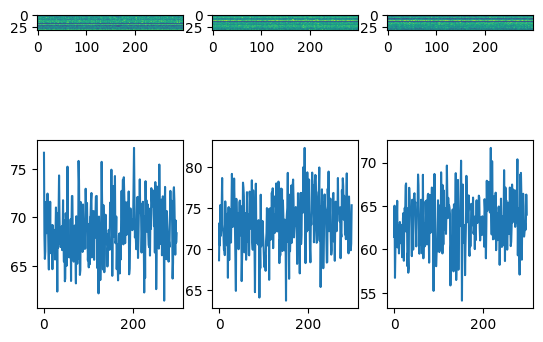

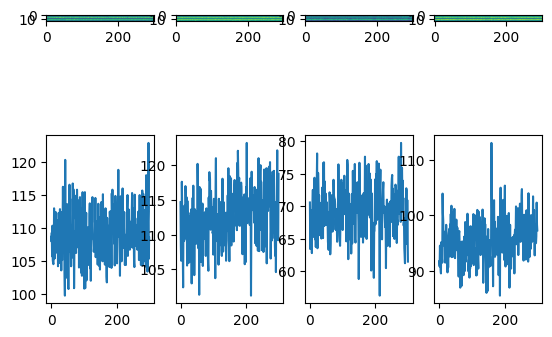

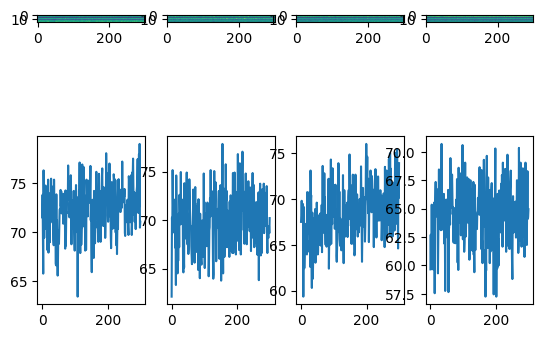

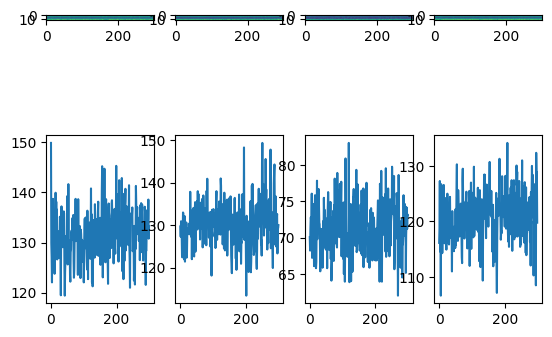

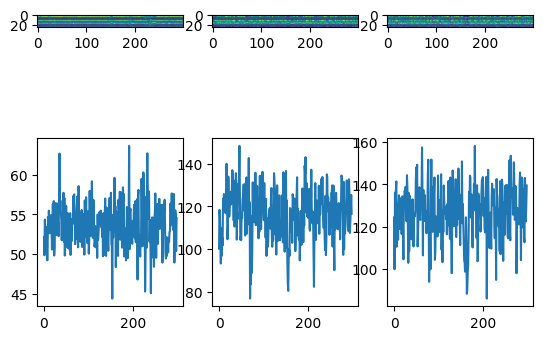

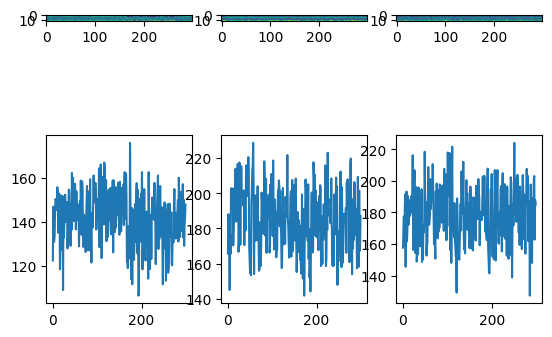

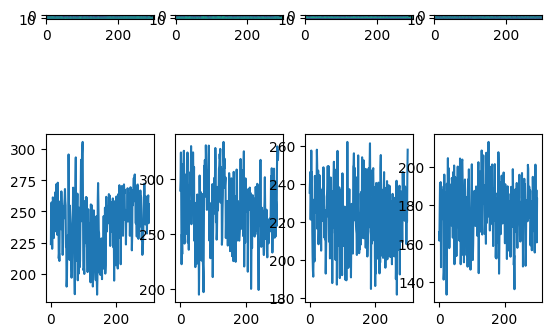

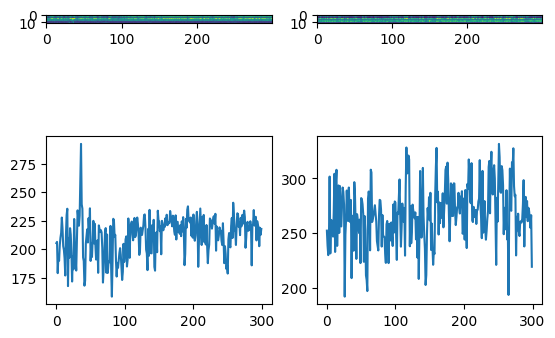

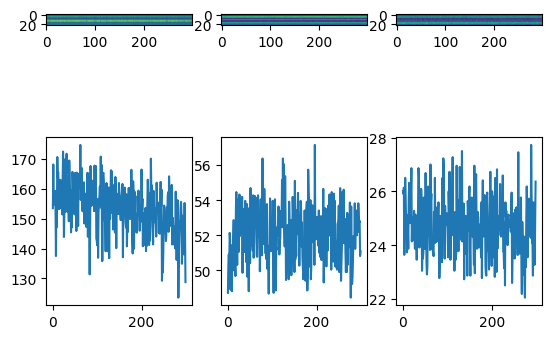

In [ ]:
# Plot Data

# Plot Loop
labels = {}
fig = []
axes = []
plot_axes = []
cbar_max = []
line_max = []
plot_idx = {"4-AP":0 , "No Drug":1 , "Bicuculline":2 , "Tetrodotoxin":3} 

for idx , (organoid , drug_dict) in enumerate(spike_data.items()): # each iteration generates a new figure (through organoids)
    figure_type = {}
    figure_data = {}

    nrows = 2
    ncols = len(drug_dict)
    
    for y in range(ncols):
        figure_type[(0,y)] = "image"
        figure_type[(1,y)] = "line"

    cbar_max.append(np.percentile(np.array(list(drug_dict.values())) , 95))
    

    label_list = []
    line_list = []
    for i , (drug , plot_data) in enumerate(drug_dict.items()):
        
        plot_data = plot_data[0] # Account for group_data making a list 


        if isinstance(plot_data[0] , str):
            figure_type[(0,i)] = "no data"
            figure_type[(1,i)] = "no data"

        else:
            
            figure_data[(0,i)] = {}
            figure_data[(1,i)] = {}

            figure_data[(0,i)]["image_data"] = plot_data
            line = np.mean(plot_data , axis=0)
            figure_data[(1,i)]["line_data"] = line
            line_list.append(np.max(line))

            label_list.append(drug)

    labels[organoid] = label_list
    line_max.append(line_list)
        

    f , ax , pax = plot.plot.get_figure(nrows=nrows , ncols=ncols , figure_type=figure_type , figure_data=figure_data) 
    fig.append(f)
    axes.append(ax)
    plot_axes.append(pax)
    


In [ ]:
# Customize Plot


for i in list(range(len(spike_data))):   

    title = list(labels.keys())[i]

    # Figure Customization
    fig[i].suptitle(title)
    fig[i].set_figheight(4)
    fig[i].set_figwidth(8)

    image_axes = axes[i][0][:]
    for i_idx , iax in enumerate(image_axes):
        iax.set_aspect("auto")
        iax.set_title(labels[title][i_idx])
        iax.set_xticks([])
        iax.set_yticks([])
    
    pax = plot_axes[i]   
    norm = mcolors.Normalize(vmin=0, vmax=cbar_max[i])
      
    for plotkey , plotvalue in pax.items():
        if isinstance(plotvalue , matplotlib.image.AxesImage):
            plotvalue.set_cmap("bwr")
            plotvalue.set_norm(norm=norm)

            pval = plotvalue


    cbar = fig[i].colorbar(pval, ax=iax , ticks = [0 , cbar_max[i]])
    cbar.set_label("Hz" , loc="center" , rotation=0)

    line_axes = axes[i][1][:]
    for l_idx , lax in enumerate(line_axes):
            lax.set_xticks([300])
            lax.set_xticklabels([f"~ 300s"])
            lax.set_yticks([line_max[i][l_idx]])
            lax.tick_params(axis='y', labelrotation=90)

    image_axes[0].set_ylabel("Channels")
    line_axes[0].set_ylabel("Spikes/s")

    




In [ ]:
fig[0]

In [ ]:
fig[1]

In [ ]:
fig[2]

In [ ]:
fig[3]

In [ ]:
fig[4]

In [ ]:
fig[5]

In [ ]:
fig[6]

In [ ]:
fig[7]

In [ ]:
fig[8]